In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
url="../Telemedicina/enrolados.csv"
url2="../Telemedicina/Telemedicina_sd_enc_python_.csv"
url3="../Telemedicina/sd.csv"

In [3]:
cuantitativo=pd.read_csv(url, encoding="latin-1", sep=";", header=0)
cualitativo=pd.read_csv(url2, encoding="latin-1", sep=";", header=0)
sd=pd.read_csv(url3, encoding="latin-1", sep=";", header=0)

# Data wrangling

In [4]:
df=pd.merge(sd, cualitativo,on="ID")

In [5]:
def new_column(row):
    if row['continuar.basal'] == "si" or row["continuar.seguimiento"] == "si":
        return 1
    else:
        return 0

In [6]:
df['continuar'] = df.apply(new_column, axis=1)

In [7]:
df_final=df.reset_index()

In [8]:
def f(row):
    if row["Edad"] <= 20:
        val = "adolescente"
    elif row["Edad"] <= 30:
        val = "joven"
    elif row["Edad"]<= 50:
        val= "adulto"
    elif row["Edad"] <=60:
        val= "adulto mayor"
    else:
        val = "tercera_edad"
    return val

In [9]:
df_final["clasificacion_etaria"] = df_final.apply(f, axis=1)

# Train-Test

In [10]:
categoricas= ["clasificacion_etaria", "Genero", "Nivel educativo", "Lugar de residencia actual", "Acceso a WiFi en el hogar", "Acceso a internet con datos del celular", "¿Qué uso podés hacer de la conexión a internet en tu hogar?", '¿Usás correo electrónico (e-mail)?','¿Usás alguna red social (whats app, facebook, instagram, etc)?','¿Acceso a computadora?', 'Acceso a tablet', 'Acceso a celular','¿Qué plan tenés en tu celular?']
x=df_final[categoricas]
dummies=pd.get_dummies(x, drop_first = True)
X=dummies
Y=df_final["continuar"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=False)

# Logistic regresion 

In [42]:
lr = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
# Ajustamos esta instancia con los datos de entrenamiento
lr.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [113]:
y_predict_prob = lr.predict_proba(X_test)
y_predict_prob_class_1 = y_predict_prob[:,1]
y_pred_class = [1 if prob > 0.35 else 0 for prob in y_predict_prob_class_1]

In [ ]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_class), 3))

In [ ]:
from sklearn.metrics import recall_score
y_pred = lr.predict(X_test)
print(recall_score(y_test, y_pred_class))

Text(50.722222222222214, 0.5, 'Reales')

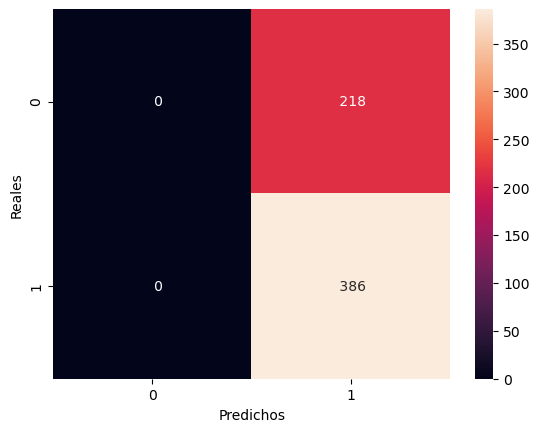

In [115]:
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.64      1.00      0.78       386

    accuracy                           0.64       604
   macro avg       0.32      0.50      0.39       604
weighted avg       0.41      0.64      0.50       604



c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
